# Проекту по спринту "Статистический анализ данных" #

Необходимо проанализировать данные популярного сервиса аренды самокатов GoFast и проверить некоторые гипотезы, которые могут помочь бизнесу вырасти.
В датафреймах содержится информация о пользователях из нескольких городов, а также об их поездках.  
Всего нам дано 3 датафрейма:
- `users_go.csv` - данные о пользователях
- `rides_go.csv` - данные о поездках
- `subscriptions_go.csv` - данные о подписках

In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st

## Шаг 1. Загрузка данных

In [56]:
df_users = pd.read_csv('/datasets/users_go.csv')

In [57]:
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB


In [58]:
df_users.head(10)

,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra
5,6,Регина,25,Краснодар,ultra
6,7,Игорь,23,Омск,ultra
7,8,Юрий,23,Краснодар,ultra
8,9,Ян,21,Пятигорск,ultra
9,10,Валерий,18,Екатеринбург,ultra


In [59]:
df_rides = pd.read_csv('/datasets/rides_go.csv')

In [60]:
df_rides.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   18068 non-null  int64  
 1   distance  18068 non-null  float64
 2   duration  18068 non-null  float64
 3   date      18068 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 564.8+ KB


In [61]:
df_rides.head(10)

,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28
5,1,2770.890808,16.650138,2021-10-09
6,1,3039.020292,14.927879,2021-10-19
7,1,2842.118050,23.117468,2021-11-06
8,1,3412.690668,15.238072,2021-11-14
9,1,748.690645,15.041884,2021-11-22


In [62]:
df_subscriptions = pd.read_csv('/datasets/subscriptions_go.csv')

In [63]:
df_subscriptions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_type  2 non-null      object
 1   minute_price       2 non-null      int64 
 2   start_ride_price   2 non-null      int64 
 3   subscription_fee   2 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 192.0+ bytes


In [64]:
df_subscriptions

,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


**Вывод:** Я загрузил 3 датафрейма. 
- Первый - `df_users` - содержит информацию о каждом пользователе: уникальный номер пользователя (user_id), его имя, возраст, город и тип подписки (free или ultra);
- Второй - `df_rides` - содержит информацию о поездках совершённых пользователями сервиса: уникальный номер пользователя, совершившего поездку (user_id), дистанцию, длительность и дату поездки;
- Третий - `df_subscriptions` - содержит информацию о подписках: типы подписки (free и ultra), стоимость одной минуты поездки, стоимость старта для каждой подписки и месячная стоимость самой подписки.

`df_rides` разумеется содержит больше всего строк, так как один и тот же пользователь может совершать нескольк поездок.

## Шаг 2. Предобработка данных

In [65]:
df_rides['date'] = pd.to_datetime(df_rides['date'], format='%Y-%m-%d')

df_rides.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   18068 non-null  int64         
 1   distance  18068 non-null  float64       
 2   duration  18068 non-null  float64       
 3   date      18068 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 564.8 KB


Привёл столбец `date` к типу даты pandas

In [66]:
df_rides.head(10)

,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28
5,1,2770.890808,16.650138,2021-10-09
6,1,3039.020292,14.927879,2021-10-19
7,1,2842.118050,23.117468,2021-11-06
8,1,3412.690668,15.238072,2021-11-14
9,1,748.690645,15.041884,2021-11-22


In [67]:
df_rides['month'] = df_rides['date'].dt.month

df_rides

,user_id,distance,duration,date,month
0,1,4409.919140,25.599769,2021-01-01,1
1,1,2617.592153,15.816871,2021-01-18,1
2,1,754.159807,6.232113,2021-04-20,4
3,1,2694.783254,18.511000,2021-08-11,8
4,1,4028.687306,26.265803,2021-08-28,8
...,...,...,...,...,...
18063,1534,3781.098080,19.822962,2021-11-04,11
18064,1534,2840.423057,21.409799,2021-11-16,11
18065,1534,3826.185507,18.435051,2021-11-18,11
18066,1534,2902.308661,16.674362,2021-11-27,11


Создал новый столбец с номером месяца на основе столбца `date`

In [68]:
print(df_rides['date'].min())

print(df_rides['date'].max())

2021-01-01 00:00:00
2021-12-30 00:00:00


Вывел минимальное и максимальное значения столбца date. У нас имеются данные за весь период 21-го года, до 31 декабря.

#### Проверка на наличие пропущенных значений:

In [69]:
df_users.isna().sum()

user_id              0
name                 0
age                  0
city                 0
subscription_type    0
dtype: int64

In [70]:
df_rides.isna().sum()

user_id     0
distance    0
duration    0
date        0
month       0
dtype: int64

In [71]:
df_subscriptions.isna().sum()

subscription_type    0
minute_price         0
start_ride_price     0
subscription_fee     0
dtype: int64

#### Удаление дубликатов:

In [72]:
df_users.duplicated().sum()

31

In [73]:
df_users = df_users.drop_duplicates().reset_index(drop=True)

df_users

,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra
...,...,...,...,...,...
1529,1530,Ростислав,29,Сочи,free
1530,1531,Никита,25,Пятигорск,free
1531,1532,Алексей,26,Тюмень,free
1532,1533,Степан,22,Краснодар,free


In [74]:
df_users.duplicated().sum()

0

In [75]:
df_rides.duplicated().sum()

0

In [76]:
df_subscriptions.duplicated().sum()

0

**Вывод:** На данном шаге мы привели столбец `date` датафрейма `df_rides` к типу даты pandas, и на его основе создали новый столбец с номером месяца `month`. Также мы проверили все 3 датафрейма на наличие пропусков и дубликатов. Обнаруженные в датафрейме `df_users` дубликаты удалили.

## Шаг 3. Исследовательский анализ данных

### Частота встречаемости городов:

In [77]:
city_counts = df_users['city'].value_counts()

city_counts

Пятигорск         219
Екатеринбург      204
Ростов-на-Дону    198
Краснодар         193
Сочи              189
Омск              183
Тюмень            180
Москва            168
Name: city, dtype: int64

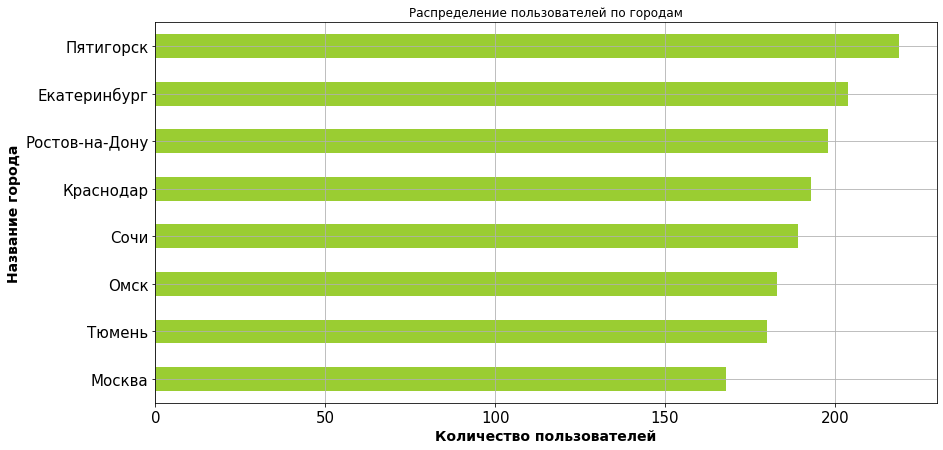

In [78]:
plt.title('Распределение пользователей по городам')
plt.xlabel('Количество пользователей', fontsize=14, fontweight='bold')
plt.ylabel('Название города', fontsize=14, fontweight='bold')

city_counts.sort_values(ascending=True).plot(grid=True, kind='barh', figsize=(14,7), fontsize=15, color='yellowgreen');

### Соотношение пользователей с подпиской и без подписки:

In [79]:
subscription_type_counts = df_users['subscription_type'].value_counts()

subscription_type_counts

free     835
ultra    699
Name: subscription_type, dtype: int64

In [80]:
data = subscription_type_counts.values
data

array([835, 699])

### Возраст пользователей:

In [81]:
df_users['age'].describe()

count    1534.000000
mean       24.903520
std         4.572367
min        12.000000
25%        22.000000
50%        25.000000
75%        28.000000
max        43.000000
Name: age, dtype: float64

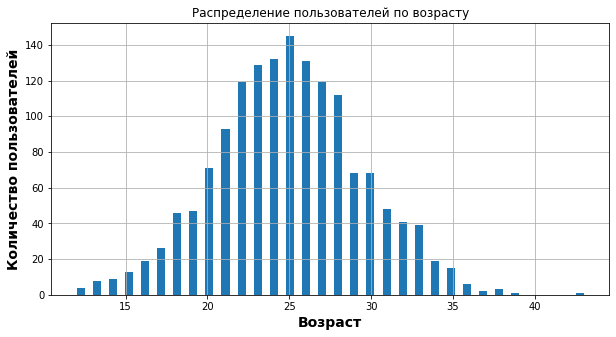

In [82]:
plt.title('Распределение пользователей по возрасту')
plt.xlabel('Возраст', fontsize=14, fontweight='bold')
plt.ylabel('Количество пользователей', fontsize=14, fontweight='bold')

df_users['age'].hist(bins=63, figsize=(10,5));

**Вывод:** Распределение пользователей по возрасту похоже на нормальное с центром около 25 лет.

### Расстояние, которое пользователь преодолел за одну поездку:

In [83]:
df_rides['distance'].describe()

count    18068.000000
mean      3070.659976
std       1116.831209
min          0.855683
25%       2543.226360
50%       3133.609994
75%       3776.222735
max       7211.007745
Name: distance, dtype: float64

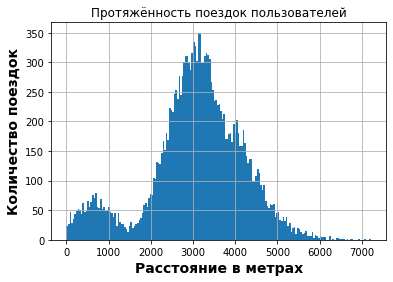

In [84]:
plt.title('Протяжённость поездок пользователей')
plt.xlabel('Расстояние в метрах', fontsize=14, fontweight='bold')
plt.ylabel('Количество поездок', fontsize=14, fontweight='bold')

df_rides['distance'].hist(bins=190);

Возможно два пиковых значения можно объянить тем, что часть пользователей использует самокаты только для каких-то коротких поездок, а часть заменяет ими транспорт и совершает протяжённые поездки.

### Продолжительность поездок:

In [32]:
df_rides['duration'].describe()

count    18068.000000
mean        17.805011
std          6.091051
min          0.500000
25%         13.597563
50%         17.678395
75%         21.724800
max         40.823963
Name: duration, dtype: float64

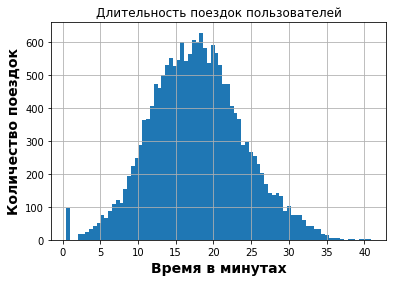

In [33]:
plt.title('Длительность поездок пользователей')
plt.xlabel('Время в минутах', fontsize=14, fontweight='bold')
plt.ylabel('Количество поездок', fontsize=14, fontweight='bold')

df_rides['duration'].hist(bins=80);

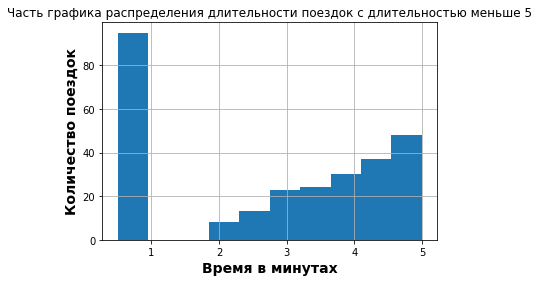

In [34]:
plt.title('Часть графика распределения длительности поездок с длительностью меньше 5')
plt.xlabel('Время в минутах', fontsize=14, fontweight='bold')
plt.ylabel('Количество поездок', fontsize=14, fontweight='bold')

df_rides.query('duration < 5')['duration'].hist();

In [35]:
df_rides.query('duration < 1')

,user_id,distance,duration,date,month
6531,701,4196.445201,0.5,2021-08-31,8
6570,704,4830.824371,0.5,2021-10-14,10
6680,712,4684.004397,0.5,2021-03-04,3
6695,713,5215.642710,0.5,2021-02-25,2
6768,718,5197.436649,0.5,2021-02-11,2
...,...,...,...,...,...
17004,1460,5531.335845,0.5,2021-01-19,1
17242,1477,6724.932981,0.5,2021-01-12,1
17314,1483,4445.481070,0.5,2021-03-06,3
17505,1496,5722.551787,0.5,2021-02-14,2


In [36]:
df_rides.query('duration == 0.5')

,user_id,distance,duration,date,month
6531,701,4196.445201,0.5,2021-08-31,8
6570,704,4830.824371,0.5,2021-10-14,10
6680,712,4684.004397,0.5,2021-03-04,3
6695,713,5215.642710,0.5,2021-02-25,2
6768,718,5197.436649,0.5,2021-02-11,2
...,...,...,...,...,...
17004,1460,5531.335845,0.5,2021-01-19,1
17242,1477,6724.932981,0.5,2021-01-12,1
17314,1483,4445.481070,0.5,2021-03-06,3
17505,1496,5722.551787,0.5,2021-02-14,2


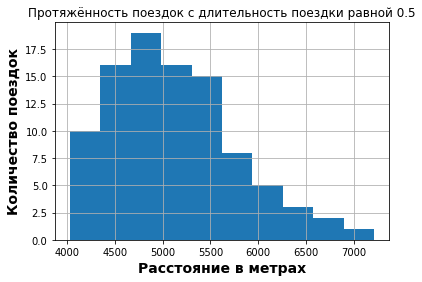

In [37]:
plt.title('Протяжённость поездок с длительность поездки равной 0.5')
plt.xlabel('Расстояние в метрах', fontsize=14, fontweight='bold')
plt.ylabel('Количество поездок', fontsize=14, fontweight='bold')

df_rides.query('duration == 0.5')['distance'].hist();

**Вывод:** В датафрейме есть 95 строк со значением в столбце duration равным 0,5. Расстояние во всех поездках распределено между примерно 4000м и 7200м. Из этого можем сделать вывод, что это аномалии и нужно удалить данные строки.

In [38]:
df_rides = df_rides[df_rides['duration'] != 0.5]

df_rides['duration'].describe()

count    17973.000000
mean        17.896480
std          5.975424
min          2.035632
25%         13.670439
50%         17.714122
75%         21.747016
max         40.823963
Name: duration, dtype: float64

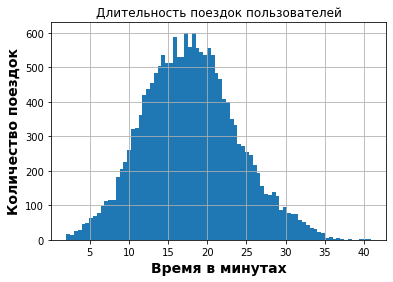

In [39]:
plt.title('Длительность поездок пользователей')
plt.xlabel('Время в минутах', fontsize=14, fontweight='bold')
plt.ylabel('Количество поездок', fontsize=14, fontweight='bold')

df_rides['duration'].hist(bins=80);

**Вывод:** Распределение длительности поездок похоже на нормальное с центром около 18 минут.

## Шаг 4. Объединение данных

In [40]:
df_users_rides = df_users.merge(df_rides, on='user_id')

df = df_users_rides.merge(df_subscriptions, on='subscription_type')

df

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.919140,25.599769,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.592153,15.816871,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.159807,6.232113,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.783254,18.511000,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.687306,26.265803,2021-08-28,8,6,0,199
...,...,...,...,...,...,...,...,...,...,...,...,...
17968,1534,Альберт,25,Краснодар,free,3781.098080,19.822962,2021-11-04,11,8,50,0
17969,1534,Альберт,25,Краснодар,free,2840.423057,21.409799,2021-11-16,11,8,50,0
17970,1534,Альберт,25,Краснодар,free,3826.185507,18.435051,2021-11-18,11,8,50,0
17971,1534,Альберт,25,Краснодар,free,2902.308661,16.674362,2021-11-27,11,8,50,0


In [41]:
df_rides

,user_id,distance,duration,date,month
0,1,4409.919140,25.599769,2021-01-01,1
1,1,2617.592153,15.816871,2021-01-18,1
2,1,754.159807,6.232113,2021-04-20,4
3,1,2694.783254,18.511000,2021-08-11,8
4,1,4028.687306,26.265803,2021-08-28,8
...,...,...,...,...,...
18063,1534,3781.098080,19.822962,2021-11-04,11
18064,1534,2840.423057,21.409799,2021-11-16,11
18065,1534,3826.185507,18.435051,2021-11-18,11
18066,1534,2902.308661,16.674362,2021-11-27,11


In [42]:
df_without_sub = df[df['subscription_type'] == 'free']
df_without_sub.reset_index(drop=True, inplace=True)

df_without_sub.head()

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,700,Айдар,22,Омск,free,2515.690719,14.944286,2021-01-02,1,8,50,0
1,700,Айдар,22,Омск,free,846.932642,16.234663,2021-02-01,2,8,50,0
2,700,Айдар,22,Омск,free,4004.434142,20.016628,2021-02-04,2,8,50,0
3,700,Айдар,22,Омск,free,1205.911290,9.782872,2021-02-10,2,8,50,0
4,700,Айдар,22,Омск,free,3047.379435,17.427673,2021-02-14,2,8,50,0


In [43]:
df_with_sub = df[df['subscription_type'] == 'ultra']
df_with_sub.reset_index(drop=True, inplace=True)

df_with_sub.head()

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.919140,25.599769,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.592153,15.816871,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.159807,6.232113,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.783254,18.511000,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.687306,26.265803,2021-08-28,8,6,0,199


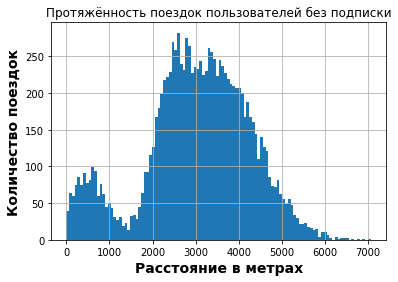

In [44]:
plt.title('Протяжённость поездок пользователей без подписки')
plt.xlabel('Расстояние в метрах', fontsize=14, fontweight='bold')
plt.ylabel('Количество поездок', fontsize=14, fontweight='bold')

df_without_sub['distance'].hist(bins=110);

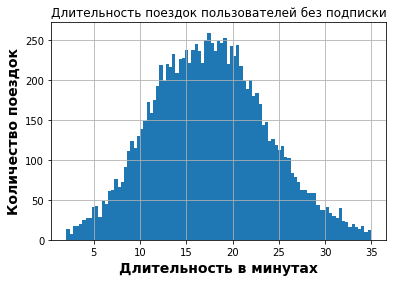

In [45]:
plt.title('Длительность поездок пользователей без подписки')
plt.xlabel('Длительность в минутах', fontsize=14, fontweight='bold')
plt.ylabel('Количество поездок', fontsize=14, fontweight='bold')

df_without_sub['duration'].hist(bins=95);

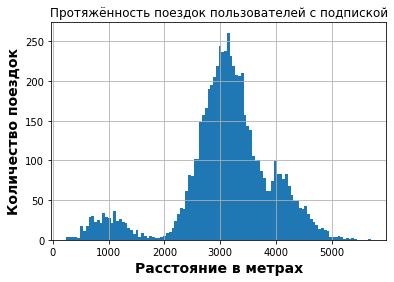

In [46]:
plt.title('Протяжённость поездок пользователей с подпиской')
plt.xlabel('Расстояние в метрах', fontsize=14, fontweight='bold')
plt.ylabel('Количество поездок', fontsize=14, fontweight='bold')

df_with_sub['distance'].hist(bins=110);

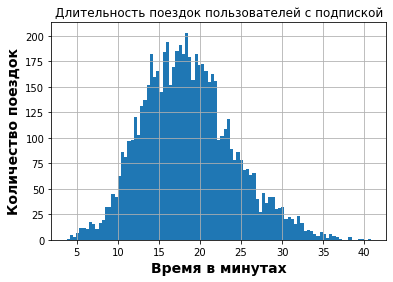

In [47]:
plt.title('Длительность поездок пользователей с подпиской')
plt.xlabel('Время в минутах', fontsize=14, fontweight='bold')
plt.ylabel('Количество поездок', fontsize=14, fontweight='bold')

df_with_sub['duration'].hist(bins=95);

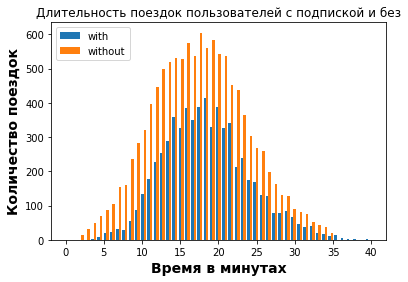

In [48]:
a = df_with_sub['duration']
b = df_without_sub['duration']

bins = np.linspace(0, 40)

plt.title('Длительность поездок пользователей с подпиской и без')
plt.xlabel('Время в минутах', fontsize=14, fontweight='bold')
plt.ylabel('Количество поездок', fontsize=14, fontweight='bold')

plt.hist([a, b], bins, label=['with', 'without'])
plt.legend(loc='upper left')
plt.show()

Распределение по времени для обоих групп примерно одинаково.

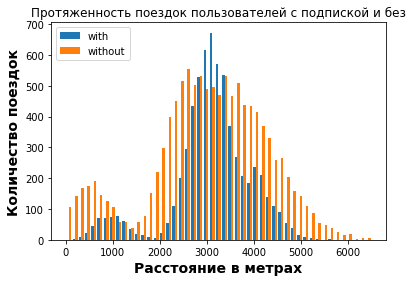

In [49]:
c = df_with_sub['distance']
d = df_without_sub['distance']

bins = np.linspace(0, 6500)

plt.title('Протяженность поездок пользователей с подпиской и без')
plt.xlabel('Расстояние в метрах', fontsize=14, fontweight='bold')
plt.ylabel('Количество поездок', fontsize=14, fontweight='bold')

plt.hist([c, d], bins, label=['with', 'without'])
plt.legend(loc='upper left')
plt.show()

Первый пик для пользователей без подписки больше смещён влево.
Второй колокол для пользователей с подпиской имеет меньшую ширину, то есть меньшее отклонение.

Это можно интерпретировать следующим образом:
- Для пользователей без подписки короткие поездки более часто явление и сами по себе короче, чем у второй группы;
- Длинные поездки у пользователей с подпиской имеют примерно тот же центр, что и у другой группы, но распределены ближе к нему.

## Шаг 5. Подсчёт выручки

### Создам датафрейм с агрегированными данными о поездках на основе датафрейма с объединёнными данными из шага 4: суммарное расстояние, количество поездок и суммарное время для каждого пользователя за каждый месяц.

In [50]:
df

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.919140,25.599769,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.592153,15.816871,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.159807,6.232113,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.783254,18.511000,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.687306,26.265803,2021-08-28,8,6,0,199
...,...,...,...,...,...,...,...,...,...,...,...,...
17968,1534,Альберт,25,Краснодар,free,3781.098080,19.822962,2021-11-04,11,8,50,0
17969,1534,Альберт,25,Краснодар,free,2840.423057,21.409799,2021-11-16,11,8,50,0
17970,1534,Альберт,25,Краснодар,free,3826.185507,18.435051,2021-11-18,11,8,50,0
17971,1534,Альберт,25,Краснодар,free,2902.308661,16.674362,2021-11-27,11,8,50,0


In [51]:
df['duration'] = np.ceil(df['duration'])
df

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.919140,26.0,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.592153,16.0,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.159807,7.0,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.783254,19.0,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.687306,27.0,2021-08-28,8,6,0,199
...,...,...,...,...,...,...,...,...,...,...,...,...
17968,1534,Альберт,25,Краснодар,free,3781.098080,20.0,2021-11-04,11,8,50,0
17969,1534,Альберт,25,Краснодар,free,2840.423057,22.0,2021-11-16,11,8,50,0
17970,1534,Альберт,25,Краснодар,free,3826.185507,19.0,2021-11-18,11,8,50,0
17971,1534,Альберт,25,Краснодар,free,2902.308661,17.0,2021-11-27,11,8,50,0


In [52]:
df_aggregated = df.groupby(['user_id', 'month']
                           ).agg({'distance':'sum',
                                  'duration': ['sum', 'count'],
                                  'subscription_type':'first',
                                  'minute_price':'first',
                                  'start_ride_price':'first',
                                  'subscription_fee':'first'})

df_aggregated.reset_index(inplace=True)

df_aggregated

user_id month      distance duration       subscription_type  \
                              sum      sum count             first   
0           1     1   7027.511294     42.0     2             ultra   
1           1     4    754.159807      7.0     1             ultra   
2           1     8   6723.470560     46.0     2             ultra   
3           1    10   5809.911100     32.0     2             ultra   
4           1    11   7003.499363     56.0     3             ultra   
...       ...   ...           ...      ...   ...               ...   
11295    1534     6   3409.468534     26.0     2              free   
11296    1534     8   7622.453034     48.0     2              free   
11297    1534     9   4928.173852     23.0     1              free   
11298    1534    11  13350.015305     78.0     4              free   
11299    1534    12   2371.711192     16.0     1              free   

      minute_price start_ride_price subscription_fee  
             first            first            first  
0                6                0              199  
1                6                0              199  
2                6                0              199  
3                6                0              199  
4                6                0              199  
...            ...              ...              ...  
11295            8               50                0  
11296            8               50                0  
11297            8               50                0  
11298            8               50                0  
11299            8               50                0  

[11300 rows x 9 columns]

In [53]:
df_aggregated.columns = df_aggregated.columns.droplevel(level=1)
df_aggregated.columns = ['user_id', 'month', 'sum_distance', 'sum_duration', 'count_rides', 'subscription_type', 'minute_price', 'start_ride_price', 'subscription_fee']

df_aggregated.sample(5)

,user_id,month,sum_distance,sum_duration,count_rides,subscription_type,minute_price,start_ride_price,subscription_fee
6793,983,12,6905.997024,32.0,2,free,8,50,0
8752,1222,8,6569.384361,36.0,2,free,8,50,0
687,106,3,3032.143766,25.0,1,ultra,6,0,199
1676,256,3,3004.898765,20.0,1,ultra,6,0,199
354,57,1,3417.126834,26.0,1,ultra,6,0,199


### В этот же датафрейм добавлю столбец с помесячной выручкой, которую принёс каждый пользователь. Для этого обращусь к информации об условиях оплаты для подписчиков и тех, у кого нет подписки. Продолжительность каждой поездки в каждой строке исходного датафрейма для подсчёта стоимости округляется до следующего целого числа: например, значения 25.3, 25.5 и 26.0 должны быть преобразованы к 26.

In [54]:
def calculate_monthly_revenue(row):
    return row['start_ride_price'] * row['count_rides'] + row['minute_price'] * row['sum_duration'] + row['subscription_fee']

df_aggregated['monthly_revenue'] = df_aggregated.apply(calculate_monthly_revenue, axis=1)

In [55]:
df_aggregated.head(10)

,user_id,month,sum_distance,sum_duration,count_rides,subscription_type,minute_price,start_ride_price,subscription_fee,monthly_revenue
0,1,1,7027.511294,42.0,2,ultra,6,0,199,451.0
1,1,4,754.159807,7.0,1,ultra,6,0,199,241.0
2,1,8,6723.470560,46.0,2,ultra,6,0,199,475.0
3,1,10,5809.911100,32.0,2,ultra,6,0,199,391.0
4,1,11,7003.499363,56.0,3,ultra,6,0,199,535.0
5,1,12,6751.629942,28.0,2,ultra,6,0,199,367.0
6,2,3,10187.723006,63.0,3,ultra,6,0,199,577.0
7,2,4,6164.381824,40.0,2,ultra,6,0,199,439.0
8,2,6,3255.338202,14.0,1,ultra,6,0,199,283.0
9,2,7,6780.722964,48.0,2,ultra,6,0,199,487.0


## Шаг 6. Проверка гипотез

**Продакт-менеджеры сервиса хотят увеличить количество пользователей с подпиской. Для этого они будут проводить различные акции, но сначала нужно выяснить несколько важных моментов.**

### Важно понять, тратят ли пользователи с подпиской больше времени на поездки? Если да, то пользователи с подпиской могут быть «выгоднее» для компании. Проверю гипотезу. Использую исходные данные о продолжительности каждой сессии — отдельно для подписчиков и тех, у кого нет подписки.

H0 - среднее время равно для подписчиков и тех, у кого нет подписки  
H1 - пользователи с подпиской тратят больше времени на поездки

In [56]:
sample_1 = df_with_sub['duration']

sample_2 = df_without_sub['duration']

alpha = 0.05 

results = st.ttest_ind(sample_1, sample_2, alternative = 'greater')

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: 4.704468074453899e-28
Отвергаем нулевую гипотезу


In [57]:
print('Среднее значение продолжительности поездки для пользователей с подпиской', sample_1.mean(), 'минут')
print('Среднее значение продолжительности поездки для пользователей без подписки', sample_2.mean(), 'минут')

Среднее значение продолжительности поездки для пользователей с подпиской 18.54198516280583 минут
Среднее значение продолжительности поездки для пользователей без подписки 17.530771268800226 минут


Есть основания считать, что пользователи с подпиской тратят больше времени на поездки.

### Расстояние одной поездки в 3130 метров — оптимальное с точки зрения износа самоката. Можно ли сказать, что расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров?

H0 - среднее расстояние, которое проезжают пользователи с подпиской за одну поездку равно 3130 метров  
H1 - среднее расстояние, которое проезжают пользователи с подпиской за одну поездку больше 3130 метров  

In [58]:
distances = df_with_sub['distance']

optimal_distance = 3130

alpha = 0.05 # уровень статистической значимости

results = st.ttest_1samp(
    distances, 
    optimal_distance,
      alternative='greater')

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не отвергаем нулевую гипотезу') 

p-значение: 0.9195368847849785
Не отвергаем нулевую гипотезу


Можно полагать, что расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров

### Проверю гипотезу о том, будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки. 

H0 - помесячная выручка от пользователей с подпиской по месяцам равна выручке от пользователей без подписки  
H1 - помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки

In [59]:
revenue_1 = df_aggregated[df_aggregated['subscription_type'] == 'ultra']['monthly_revenue']

revenue_2 = df_aggregated[df_aggregated['subscription_type'] == 'free']['monthly_revenue']

alpha = 0.05 

results = st.ttest_ind(revenue_1, revenue_2, alternative = 'greater')

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: 2.0314113674863288e-30
Отвергаем нулевую гипотезу


In [60]:
print('Среднее значение помесячной выручки от пользователей с подпиской', revenue_1.mean())
print('Среднее значение помесячной выручки от пользователей без подписки', revenue_2.mean())

Среднее значение помесячной выручки от пользователей с подпиской 362.7921906022502
Среднее значение помесячной выручки от пользователей без подписки 329.3326437121324


**Есть основания полагать, что помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки**

***Итоговый вывод:*** 
1. Мы нашли и удалили дубликаты и аномалии в данных;  
  
  
2. Изучили датафреймы:
 - где больше пользователей (больше всего в Пятигорске, меньше всего в Москве);  
 - сколько с подпиской и без (без подписки - 54%);  
 - распределение пользователей по возрасту (центр распределения - 25 лет);    
 - распределение поездок по протяженности (имеет два пика - около 500 метров и 3000 метров);    
 - распределение поездок по длительности ( центр около 18 минут).  
  
  
3. Сравнили распределения поездок по длительности и протяженности для обеих групп пользователей:
 - распределение по длительности для обеих групп примерно одинаково;  
 - для распределения по протяженности первый пик для пользователей без подписки больше смещён влево, второй колокол для пользователей с подпиской имеет меньшую ширину, то есть меньшее отклонение.  
  
  
4. Посчитали помесячную выручку для каждого пользователя;  
  
  
5. И проверили 3 гипотезы:
 - Равно ли среднее для тех у кого есть подписка и тех, у кого её нет (есть основания полагать, что пользователи с подпиской тратят больше времени на поездки)

 - Равно ли среднее расстояние, которое проезжают пользователи с подпиской за одну поездку 3130 метров (можно полагать, что это расстояние не превышает 3130 метров)

 - Равна ли помесячная выручка от пользователей с подпиской по месяцам выручке от пользователей без подписки (есть причины полагать, что помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки)
  
  